In [ ]:
import pandas as pd
inputdf=pd.read_csv("C:/IDS/TRAINING/Applied Data Science Techniques with Python/Course_Data/organics.csv")

In [ ]:
inputdf=inputdf.drop(['ID','DemAffl','DemCluster','DemReg','DemTVReg','PromClass','PromTime', 'TargetAmt'], axis=1)

In [ ]:
# Count the number of missing values for each column 
inputdf.isnull().sum()

In [ ]:
# Imputation for Gender and DemClusterGroup
values={'DemGender': 'Gender_Null', 'DemClusterGroup': 'Cluster_Null'}
inputdf=inputdf.fillna(value=values)
inputdf.head(50)

In [ ]:
# Check frequency tables for categoric variables
inputdf['DemGender'].value_counts()
inputdf['DemGender'].value_counts(normalize=True)

In [ ]:
# Check missing value distributions for numerical variables

import matplotlib.pyplot as plt
plt.hist(inputdf.PromSpend)
inputdf.describe()

In [ ]:
# Imputation for Numeric Variables
values={'DemAge': '53.8', 'PromSpend': inputdf['PromSpend'].median()}
inputdf=inputdf.fillna(value=values)

In [ ]:
# Count the number of missing values for each column 
inputdf.isnull().sum()

In [ ]:
X_input_Ctg=inputdf[['DemClusterGroup', 'DemGender']]
X_input_Num=inputdf[['DemAge', 'PromSpend']]
Y_Target=inputdf[['TargetBuy']]

In [ ]:
# Convert Categoric values to encoded values
X_input_Ctg=pd.get_dummies(X_input_Ctg)
X_input_Ctg=X_input_Ctg.apply(pd.to_numeric)

In [ ]:
# Merge Categoric Dummy Variables and Numeric vars in a same datarame
X_Input=pd.merge(X_input_Ctg,X_input_Num,left_index=True, right_index=True, how='inner')

In [ ]:
X_Input
Y_Target

In [ ]:
# DATA PARTITION 
from sklearn.model_selection import train_test_split
X_train, xTest, YTrain, YTest=train_test_split(X_Input, Y_Target, test_size=0.5, random_state=123)


In [ ]:
# Check Dummy Distributions
print(YTrain['TargetBuy'].value_counts(normalize=True))
print(YTest['TargetBuy'].value_counts(normalize=True))

print(X_train['DemGender_M'].value_counts(normalize=True))
print(xTest['DemGender_M'].value_counts(normalize=True))

In [ ]:
# Check Interval Distributions
print(X_train.describe())
print(xTest.describe())


In [53]:
# Lets run a decision tree Alg.
# Load REquired Libs.

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

[Text(167.4, 181.2, 'X[12] <= 44.5\ngini = 0.371\nsamples = 11111\nvalue = [8376, 2735]'),
 Text(83.7, 108.72, 'X[8] <= 0.5\ngini = 0.5\nsamples = 2761\nvalue = [1338, 1423]'),
 Text(41.85, 36.23999999999998, 'gini = 0.441\nsamples = 1004\nvalue = [674, 330]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.47\nsamples = 1757\nvalue = [664, 1093]'),
 Text(251.10000000000002, 108.72, 'X[8] <= 0.5\ngini = 0.265\nsamples = 8350\nvalue = [7038, 1312]'),
 Text(209.25, 36.23999999999998, 'gini = 0.143\nsamples = 4021\nvalue = [3709, 312]'),
 Text(292.95, 36.23999999999998, 'gini = 0.355\nsamples = 4329\nvalue = [3329, 1000]')]

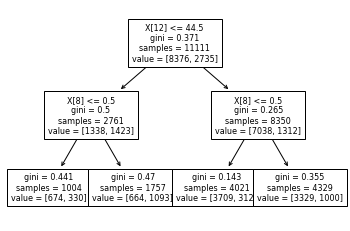

In [66]:
# Train the model with using Decision Tree Classifier

Clf=DecisionTreeClassifier(criterion='gini', max_depth=2)
clf1=Clf.fit(X_train,YTrain)

tree.plot_tree(clf1, fontsize=8)


In [69]:
feat_importance=pd.DataFrame(clf1.tree_.compute_feature_importances(normalize=False))

In [70]:
feat_importance

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.018731
9,0.000000


In [71]:
X_train

,DemClusterGroup_A,DemClusterGroup_B,DemClusterGroup_C,DemClusterGroup_Cluster_Null,DemClusterGroup_D,DemClusterGroup_E,DemClusterGroup_F,DemClusterGroup_U,DemGender_F,DemGender_Gender_Null,DemGender_M,DemGender_U,DemAge,PromSpend
3426,0,0,0,0,0,0,1,0,1,0,0,0,45.0,0.01
431,1,0,0,0,0,0,0,0,0,0,1,0,61.0,0.01
16502,0,0,1,0,0,0,0,0,1,0,0,0,69.0,4884.25
20912,0,0,0,0,0,0,1,0,0,0,1,0,23.0,1000.00
5288,0,0,0,0,0,1,0,0,1,0,0,0,55.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15377,0,0,0,0,0,1,0,0,0,0,1,0,51.0,1250.00
21602,0,0,0,0,0,0,1,0,0,1,0,0,57.0,0.01
17730,0,0,1,0,0,0,0,0,1,0,0,0,72.0,9000.00
15725,0,0,0,0,1,0,0,0,0,1,0,0,76.0,6600.00


In [72]:
print(tree.export_text(clf1))

|--- feature_12 <= 44.50
|   |--- feature_8 <= 0.50
|   |   |--- class: 0
|   |--- feature_8 >  0.50
|   |   |--- class: 1
|--- feature_12 >  44.50
|   |--- feature_8 <= 0.50
|   |   |--- class: 0
|   |--- feature_8 >  0.50
|   |   |--- class: 0



In [77]:
y_train_pred=clf1.predict(X_train)
Train_probs=clf1.predict_proba(X_train)
Test_probs=clf1.predict_proba(xTest)

In [79]:
print(Test_probs)

[[0.76899977 0.23100023]
 [0.67131474 0.32868526]
 [0.3779169  0.6220831 ]
 ...
 [0.76899977 0.23100023]
 [0.92240736 0.07759264]
 [0.76899977 0.23100023]]


In [80]:
# Outputs are array, Convert them into a dataframe

Train_probsdf=pd.DataFrame({'Prob0' :Train_probs[:,0],  'Prob1' :Train_probs[:,1]})

In [81]:
Train_probsdf

,Prob0,Prob1
0,0.769000,0.231000
1,0.922407,0.077593
2,0.769000,0.231000
3,0.671315,0.328685
4,0.769000,0.231000
...,...,...
11106,0.922407,0.077593
11107,0.922407,0.077593
11108,0.769000,0.231000
11109,0.922407,0.077593


In [82]:
X_train

,DemClusterGroup_A,DemClusterGroup_B,DemClusterGroup_C,DemClusterGroup_Cluster_Null,DemClusterGroup_D,DemClusterGroup_E,DemClusterGroup_F,DemClusterGroup_U,DemGender_F,DemGender_Gender_Null,DemGender_M,DemGender_U,DemAge,PromSpend
3426,0,0,0,0,0,0,1,0,1,0,0,0,45.0,0.01
431,1,0,0,0,0,0,0,0,0,0,1,0,61.0,0.01
16502,0,0,1,0,0,0,0,0,1,0,0,0,69.0,4884.25
20912,0,0,0,0,0,0,1,0,0,0,1,0,23.0,1000.00
5288,0,0,0,0,0,1,0,0,1,0,0,0,55.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15377,0,0,0,0,0,1,0,0,0,0,1,0,51.0,1250.00
21602,0,0,0,0,0,0,1,0,0,1,0,0,57.0,0.01
17730,0,0,1,0,0,0,0,0,1,0,0,0,72.0,9000.00
15725,0,0,0,0,1,0,0,0,0,1,0,0,76.0,6600.00


In [126]:
df=pd.read_csv("C:/IDS/TRAINING/Applied Data Science Techniques with Python/Course_Data/dungaree.csv")
df.describe()

,STOREID,FASHION,LEISURE,STRETCH,ORIGINAL,SALESTOT
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,345.000000,92.262700,1916.419448,444.040639,1849.384615,4302.107402
std,199.041453,32.616282,350.839963,211.690142,291.607975,366.213204
min,1.000000,1.000000,650.000000,2.000000,823.000000,2140.000000
25%,173.000000,70.000000,1695.000000,312.000000,1658.000000,4342.000000
50%,345.000000,88.000000,1904.000000,428.000000,1860.000000,4399.000000
75%,517.000000,112.000000,2148.000000,568.000000,2053.000000,4442.000000
max,689.000000,204.000000,2929.000000,1224.000000,2715.000000,4594.000000


In [107]:
df=df.drop(['STOREID','SALESTOT'], axis=1)
from sklearn import preprocessing 

In [99]:
standardizeddf=preprocessing.scale(df)
standardizeddf2=pd.DataFrame(standardizeddf)

In [120]:
standardizeddf2

,0,1,2,3
0,2.753303,-1.107917,0.245628,1.213521
1,1.127167,0.942939,-0.699835,0.139382
2,0.452167,-0.754223,-0.836927,1.690534
3,0.758985,-0.491805,-0.118375,0.925253
4,0.544212,-0.514624,1.470004,-0.234679
...,...,...,...,...
684,-0.928514,-1.113622,2.018372,0.365878
685,-1.081923,-1.005232,-2.061302,-0.275860
686,0.360122,0.132865,-0.803836,0.698758
687,-1.266014,0.400988,-0.241285,0.177131


In [128]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=6)
kmeans.fit(standardizeddf2)




KMeans(n_clusters=6)

In [129]:
clusterlabels=kmeans.predict(standardizeddf2)

In [130]:
clusterlabels

array([1, 1, 0, 0, 2, 2, 4, 4, 0, 0, 3, 0, 1, 5, 4, 3, 1, 0, 2, 1, 4, 4,
       4, 1, 2, 2, 4, 2, 0, 0, 4, 0, 0, 0, 4, 4, 2, 3, 0, 1, 2, 2, 1, 2,
       4, 2, 3, 1, 0, 4, 4, 2, 0, 1, 1, 1, 0, 1, 2, 2, 4, 5, 2, 4, 0, 1,
       2, 2, 0, 5, 2, 4, 4, 4, 3, 4, 1, 2, 2, 4, 2, 4, 1, 0, 4, 0, 4, 4,
       3, 4, 2, 4, 5, 4, 3, 4, 1, 2, 0, 1, 1, 3, 2, 0, 2, 4, 1, 3, 2, 0,
       4, 0, 2, 0, 3, 4, 4, 4, 3, 1, 3, 3, 2, 1, 2, 3, 0, 4, 4, 4, 4, 1,
       0, 0, 0, 0, 2, 2, 0, 4, 4, 0, 1, 0, 2, 2, 0, 0, 0, 1, 4, 3, 0, 4,
       1, 2, 0, 0, 1, 3, 4, 0, 4, 4, 1, 4, 4, 1, 0, 0, 4, 2, 2, 4, 0, 5,
       0, 0, 0, 1, 0, 0, 4, 4, 2, 2, 1, 3, 4, 0, 1, 1, 0, 2, 0, 0, 2, 3,
       0, 1, 4, 2, 1, 1, 4, 2, 4, 1, 0, 4, 4, 4, 1, 4, 2, 3, 0, 4, 0, 2,
       0, 1, 4, 0, 4, 3, 1, 2, 2, 4, 4, 1, 4, 1, 0, 2, 1, 0, 2, 1, 4, 4,
       3, 4, 2, 0, 2, 0, 4, 1, 2, 3, 0, 4, 4, 3, 1, 0, 0, 4, 4, 4, 2, 0,
       4, 0, 3, 0, 4, 4, 1, 2, 1, 0, 3, 2, 0, 2, 3, 1, 4, 4, 0, 4, 0, 1,
       1, 3, 1, 5, 0, 4, 0, 0, 1, 0, 0, 3, 0, 3, 2,

In [131]:
Clusters=pd.DataFrame(data=clusterlabels, columns=['Cluster_Name'])

In [132]:
Clusters

,Cluster_Name
0,1
1,1
2,0
3,0
4,2
...,...
684,2
685,3
686,0
687,0


In [133]:
mergeddf=pd.merge(df,Clusters,left_index=True, right_index=True, how='inner')

In [134]:
mergeddf.head(50)

,STOREID,FASHION,LEISURE,STRETCH,ORIGINAL,SALESTOT,Cluster_Name
0,1,182,1528,496,2203,4409,1
1,2,129,2247,296,1890,4562,1
2,3,107,1652,267,2342,4368,0
3,4,117,1744,419,2119,4399,0
4,5,110,1736,755,1781,4382,2
5,6,79,1637,613,2138,4467,2
6,7,73,2484,468,1216,4241,4
7,8,64,2675,209,1504,4452,4
8,9,100,1795,561,1933,4389,0
9,10,126,1789,180,2405,4500,0


In [135]:
pd.set_option('display.max_columns',None) 
mergeddf.groupby('Cluster_Name').describe()

STOREID                                                       \
               count        mean         std   min     25%    50%     75%   
Cluster_Name                                                                
0              181.0  349.071823  194.815355   3.0  181.00  339.0  528.00   
1              127.0  362.787402  206.487120   1.0  191.50  372.0  543.00   
2              122.0  332.754098  206.636956   5.0  139.75  346.0  508.75   
3               46.0  293.739130  194.089949  11.0  121.25  261.5  444.25   
4              203.0  354.926108  194.083221   7.0  195.00  363.0  520.00   
5               10.0  229.100000  165.199173  14.0   75.75  233.0  376.00   

                    FASHION                                               \
                max   count        mean        std    min     25%    50%   
Cluster_Name                                                               
0             688.0   181.0   84.508287  19.247978   42.0   70.00   85.0   
1             682.0   127.0  138.637795  23.377397  101.0  120.00  133.0   
2             685.0   122.0   82.459016  22.702222   34.0   67.25   80.5   
3             686.0    46.0   80.891304  28.923830   32.0   62.00   75.5   
4             689.0   203.0   82.970443  22.177482   26.0   67.00   80.0   
5             450.0    10.0    4.200000   5.094660    1.0    1.25    2.5   

                            LEISURE                                            \
                 75%    max   count         mean         std     min      25%   
Cluster_Name                                                                    
0              99.00  135.0   181.0  1795.066298  189.818410  1184.0  1683.00   
1             155.00  204.0   127.0  1931.314961  212.327454  1416.0  1787.00   
2              95.75  159.0   122.0  1615.180328  212.219402  1057.0  1466.00   
3              97.75  147.0    46.0  1703.021739  189.006348  1358.0  1555.00   
4              97.00  149.0   203.0  2297.724138  201.231611  1913.0  2147.50   
5               4.75   18.0    10.0   840.000000  188.896797   650.0   674.75   

                                     STRETCH                                 \
                 50%     75%     max   count        mean         std    min   
Cluster_Name                                                                  
0             1828.0  1932.0  2150.0   181.0  394.303867  102.397762  140.0   
1             1943.0  2080.5  2532.0   127.0  435.905512  141.517481   11.0   
2             1619.0  1764.0  2021.0   122.0  757.385246  137.370191  579.0   
3             1700.0  1813.0  2231.0    46.0   26.347826   24.269979    2.0   
4             2254.0  2444.5  2929.0   203.0  406.128079  124.762282  113.0   
5              770.5  1045.0  1073.0    10.0  315.800000   74.405496  227.0   

                                           ORIGINAL                           \
                 25%    50%    75%     max    count         mean         std   
Cluster_Name                                                                   
0             311.00  408.0  466.0   585.0    181.0  2129.933702  174.362700   
1             331.00  412.0  539.0   822.0    127.0  1891.637795  182.728164   
2             657.50  718.5  824.5  1224.0    122.0  1943.475410  201.245839   
3               8.75   21.5   30.0   130.0     46.0  1585.108696  211.296130   
4             311.00  398.0  482.5   750.0    203.0  1616.034483  163.430076   
5             251.00  318.5  368.0   447.0     10.0  1039.600000  126.002822   

                                                       SALESTOT               \
                 min      25%     50%      75%     max    count         mean   
Cluster_Name                                                                   
0             1857.0  1999.00  2099.0  2237.00  2715.0    181.0  4403.812155   
1             1404.0  1781.50  1878.0  2001.00  2395.0    127.0  4397.496063   
2             1507.0  1806.75  1941.0  2055.75  2413.0    122.0  4398.5

In [119]:
# Analitik Cluster
# Etiketleme (Profilleme)

Cl1 ==> Fashion yoğun
Cl5 ==> Düşük Performansların 


SyntaxError: invalid syntax (<ipython-input-119-37cecef5257c>, line 4)